# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo `estrutura_sinasc_para_CD.pdf` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
`
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis `['ESTCIVMAE', 'CONSULTAS']` possuem o código `9`, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código `9`.<br>
6. Substitua os valores faltantes da quantitativa (`QTDFILVIVO`) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`.

In [71]:
import pandas as pd
import numpy as np
import requests

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

In [72]:
# 2) seu código aqui
sinasc.isna().sum()
sinasc.dropna()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea


In [73]:
# 3) seu código aqui
def contagem(x):
    collumns = x.columns
    for i in collumns:
        print(f'{i} tem {x[i].isna().sum()} valores missing')
    return x.isna().sum()

pd.DataFrame(contagem(sinasc))

ORIGEM tem 0 valores missing
CODESTAB tem 115 valores missing
CODMUNNASC tem 0 valores missing
LOCNASC tem 0 valores missing
IDADEMAE tem 0 valores missing
ESTCIVMAE tem 317 valores missing
ESCMAE tem 312 valores missing
CODOCUPMAE tem 2907 valores missing
QTDFILVIVO tem 1573 valores missing
QTDFILMORT tem 2098 valores missing
CODMUNRES tem 0 valores missing
GESTACAO tem 1232 valores missing
GRAVIDEZ tem 79 valores missing
PARTO tem 49 valores missing
CONSULTAS tem 0 valores missing
DTNASC tem 0 valores missing
HORANASC tem 21 valores missing
SEXO tem 4 valores missing
APGAR1 tem 96 valores missing
APGAR5 tem 103 valores missing
RACACOR tem 647 valores missing
PESO tem 0 valores missing
IDANOMAL tem 591 valores missing
DTCADASTRO tem 0 valores missing
CODANOMAL tem 26814 valores missing
NUMEROLOTE tem 0 valores missing
VERSAOSIST tem 0 valores missing
DTRECEBIM tem 0 valores missing
DIFDATA tem 0 valores missing
DTRECORIGA tem 27028 valores missing
NATURALMAE tem 298 valores missing
CO

,0
ORIGEM,0
CODESTAB,115
CODMUNNASC,0
LOCNASC,0
IDADEMAE,0
...,...
munResUf,0
munResLat,1
munResLon,1
munResAlt,1


In [74]:
# 4) seu código aqui
pd.DataFrame(contagem(sinasc)).T

ORIGEM tem 0 valores missing
CODESTAB tem 115 valores missing
CODMUNNASC tem 0 valores missing
LOCNASC tem 0 valores missing
IDADEMAE tem 0 valores missing
ESTCIVMAE tem 317 valores missing
ESCMAE tem 312 valores missing
CODOCUPMAE tem 2907 valores missing
QTDFILVIVO tem 1573 valores missing
QTDFILMORT tem 2098 valores missing
CODMUNRES tem 0 valores missing
GESTACAO tem 1232 valores missing
GRAVIDEZ tem 79 valores missing
PARTO tem 49 valores missing
CONSULTAS tem 0 valores missing
DTNASC tem 0 valores missing
HORANASC tem 21 valores missing
SEXO tem 4 valores missing
APGAR1 tem 96 valores missing
APGAR5 tem 103 valores missing
RACACOR tem 647 valores missing
PESO tem 0 valores missing
IDANOMAL tem 591 valores missing
DTCADASTRO tem 0 valores missing
CODANOMAL tem 26814 valores missing
NUMEROLOTE tem 0 valores missing
VERSAOSIST tem 0 valores missing
DTRECEBIM tem 0 valores missing
DIFDATA tem 0 valores missing
DTRECORIGA tem 27028 valores missing
NATURALMAE tem 298 valores missing
CO

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,0,115,0,0,0,317,312,2907,1573,2098,...,0,0,0,0,0,0,1,1,1,1


In [75]:
# 5) seu código aqui
sinasc['ESTCIVMAE'] = sinasc['ESTCIVMAE'].fillna(9)
sinasc['CONSULTAS'] = sinasc['CONSULTAS'].fillna(9)
sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [76]:
# 6) Seu código aqui
sinasc['QTDFILVIVO'] = sinasc['QTDFILVIVO'].fillna(0)
sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [77]:
# 7) seu código aqui

# range APGAR5

np.array(range(0,10))
def classificacao(x):
    if x >= 8 and x <= 10:
        return 'normal'
    elif x >= 6 and x <= 7:
        return 'asfixia leve'
    elif x >= 4 and x <= 5:
        return 'asfixia moderada'
    else:
        return 'asfixia severa'
    
pd.Series(sinasc['APGAR5'].apply(classificacao))

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: APGAR5, Length: 27028, dtype: object

In [78]:
# 8) seu código aqui

pd.Series(sinasc['APGAR5'].apply(classificacao)).value_counts()

APGAR5
normal              26463
asfixia leve          320
asfixia severa        177
asfixia moderada       68
Name: count, dtype: int64

<Axes: xlabel='APGAR5'>

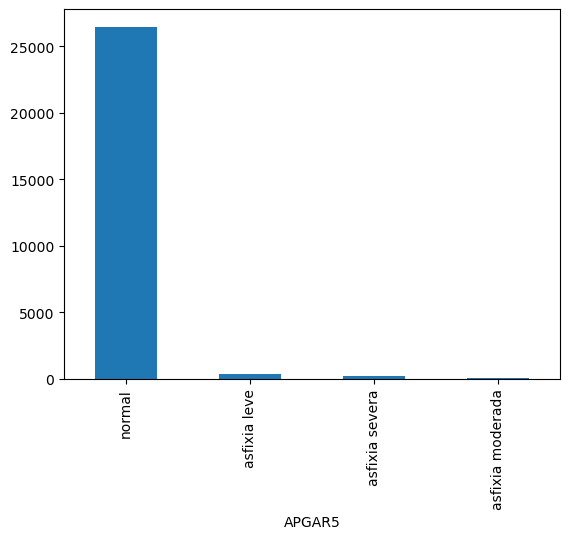

In [79]:
# 9) seu código aqui

pd.Series(sinasc['APGAR5'].apply(classificacao)).value_counts().plot.bar()